<a href="https://colab.research.google.com/github/michiWS1920/ADS20/blob/master/ADS_Programming_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment 2
**Getting and visualizing data**

In the second problem set you will leverage webscraping and API calls to collect interesting data-sets. Subsequently, you will plot the resulting data-sets using ```ggplot```.

To perform your analysis you have to load the library ```tidyverse```. Additionally, we use the ```jsonlite``` to perform API requests and ```rvest``` for webscraping. If you want to use additional libraries you can add them to the following cell:

In [1]:
library(tidyverse)
library(lubridate)
library(jsonlite)
library(rvest)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten


Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding




## Task 1
**COVID-19**

The free [COVID-19 API](https://covid19api.com) provides data sourced from Johns Hopkins CSSE. You can find a detailed documentation on the API and the allowed routes [here](https://documenter.getpostman.com/view/10808728/SzS8rjbc?version=latest).

Your first task is to study the documentation and make an API call to request all available countries. How many countries are listed?

* 248 countries listed

In [0]:
url = 'https://api.covid19api.com/countries'
covid_test = fromJSON(url)
covid_test

,Country,Slug,ISO2
,<chr>,<chr>,<chr>
1,Holy See (Vatican City State),holy-see-vatican-city-state,VA
2,Nepal,nepal,NP
3,Philippines,philippines,PH
4,Saint Lucia,saint-lucia,LC
5,Cambodia,cambodia,KH
6,Cayman Islands,cayman-islands,KY
7,Saint-Martin (French part),saint-martin-french-part,MF
8,Singapore,singapore,SG
9,Tokelau,tokelau,TK


In [0]:
covid_test %>%
filter(Country == "United States of America")

Country,Slug,ISO2
<chr>,<chr>,<chr>
United States of America,united-states,US


Next, select 8 countries and retrieve the number of confirmed cases as well as the number of deaths and recovered patients since the first case was recorded in each of the 8 countries.

In [0]:
base_url = "https://api.covid19api.com/total/dayone/country/"
countries = c("brazil", "germany", "mexico")

urls = paste0(base_url, countries)
urls

[1] "https://api.covid19api.com/total/dayone/country/brazil" 
[2] "https://api.covid19api.com/total/dayone/country/germany"
[3] "https://api.covid19api.com/total/dayone/country/mexico"

* More elegant approach

In [0]:
getFun = function(url){
  response = fromJSON(url)
  return(data.frame(response))
}
countries = c("brazil", "germany", "mexico", "turkey", "ireland", "sweden", "spain", "norway")
base_url = "https://api.covid19api.com/total/dayone/country/"
urls = paste0(base_url, countries)

In [0]:
covid_countries = map_df(urls, getFun)

In [0]:
covid_countries

Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
Brazil,,,,,0,0,1,0,0,1,2020-02-26T00:00:00Z
Brazil,,,,,0,0,1,0,0,1,2020-02-27T00:00:00Z
Brazil,,,,,0,0,1,0,0,1,2020-02-28T00:00:00Z
Brazil,,,,,0,0,2,0,0,2,2020-02-29T00:00:00Z
Brazil,,,,,0,0,2,0,0,2,2020-03-01T00:00:00Z
Brazil,,,,,0,0,2,0,0,2,2020-03-02T00:00:00Z
Brazil,,,,,0,0,2,0,0,2,2020-03-03T00:00:00Z
Brazil,,,,,0,0,4,0,0,4,2020-03-04T00:00:00Z
Brazil,,,,,0,0,4,0,0,4,2020-03-05T00:00:00Z


* previous approach without the function

In [0]:
base_url = "https://api.covid19api.com/total/dayone/country/"
countries = c("brazil", "germany", "mexico", "turkey", "ireland", "sweden", "spain", "norway")
brazil = fromJSON(paste0(base_url, "brazil"))
germany = fromJSON(paste0(base_url, "germany"))
Mexico = fromJSON(paste0(base_url, "mexico"))
turkey = fromJSON(paste0(base_url, "turkey"))
ireland = fromJSON(paste0(base_url, "ireland"))
sweden = fromJSON(paste0(base_url, "sweden")) 
spain = fromJSON(paste0(base_url, "spain"))
norway = fromJSON(paste0(base_url, "norway"))
bind_rows(brazil, germany, Mexico, turkey, ireland, sweden, spain, norway) -> covid_countries
covid_countries %>%
sample_n(10)

Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
Mexico,,,,,0,0,5847,449,2125,3273,2020-04-15T00:00:00Z
Ireland,,,,,0,0,1,0,0,1,2020-02-29T00:00:00Z
Turkey,,,,,0,0,1872,44,0,1828,2020-03-24T00:00:00Z
Turkey,,,,,0,0,10827,168,162,10497,2020-03-30T00:00:00Z
Norway,,,,,0,0,8364,235,7727,402,2020-05-25T00:00:00Z
Mexico,,,,,0,0,35022,3465,21824,9733,2020-05-10T00:00:00Z
Turkey,,,,,0,0,146457,4055,106133,36269,2020-05-15T00:00:00Z
Turkey,,,,,0,0,141475,3894,98889,38692,2020-05-12T00:00:00Z
Ireland,,,,,0,0,12547,444,77,12026,2020-04-15T00:00:00Z


In [0]:
covid_countries %>%
mutate(Date= as.Date(Date, format= "%Y-%m-%d")) %>% 
 pivot_longer(c("Confirmed", "Deaths", "Recovered"),
               names_to = "type",
               values_to = "Count") -> covid_long
covid_long %>%
head(10)

Country,CountryCode,Province,City,CityCode,Lat,Lon,Active,Date,type,Count
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<date>,<chr>,<int>
Brazil,,,,,0,0,1,2020-02-26,Confirmed,1
Brazil,,,,,0,0,1,2020-02-26,Deaths,0
Brazil,,,,,0,0,1,2020-02-26,Recovered,0
Brazil,,,,,0,0,1,2020-02-27,Confirmed,1
Brazil,,,,,0,0,1,2020-02-27,Deaths,0
Brazil,,,,,0,0,1,2020-02-27,Recovered,0
Brazil,,,,,0,0,1,2020-02-28,Confirmed,1
Brazil,,,,,0,0,1,2020-02-28,Deaths,0
Brazil,,,,,0,0,1,2020-02-28,Recovered,0


In [0]:
options(scipen=999)

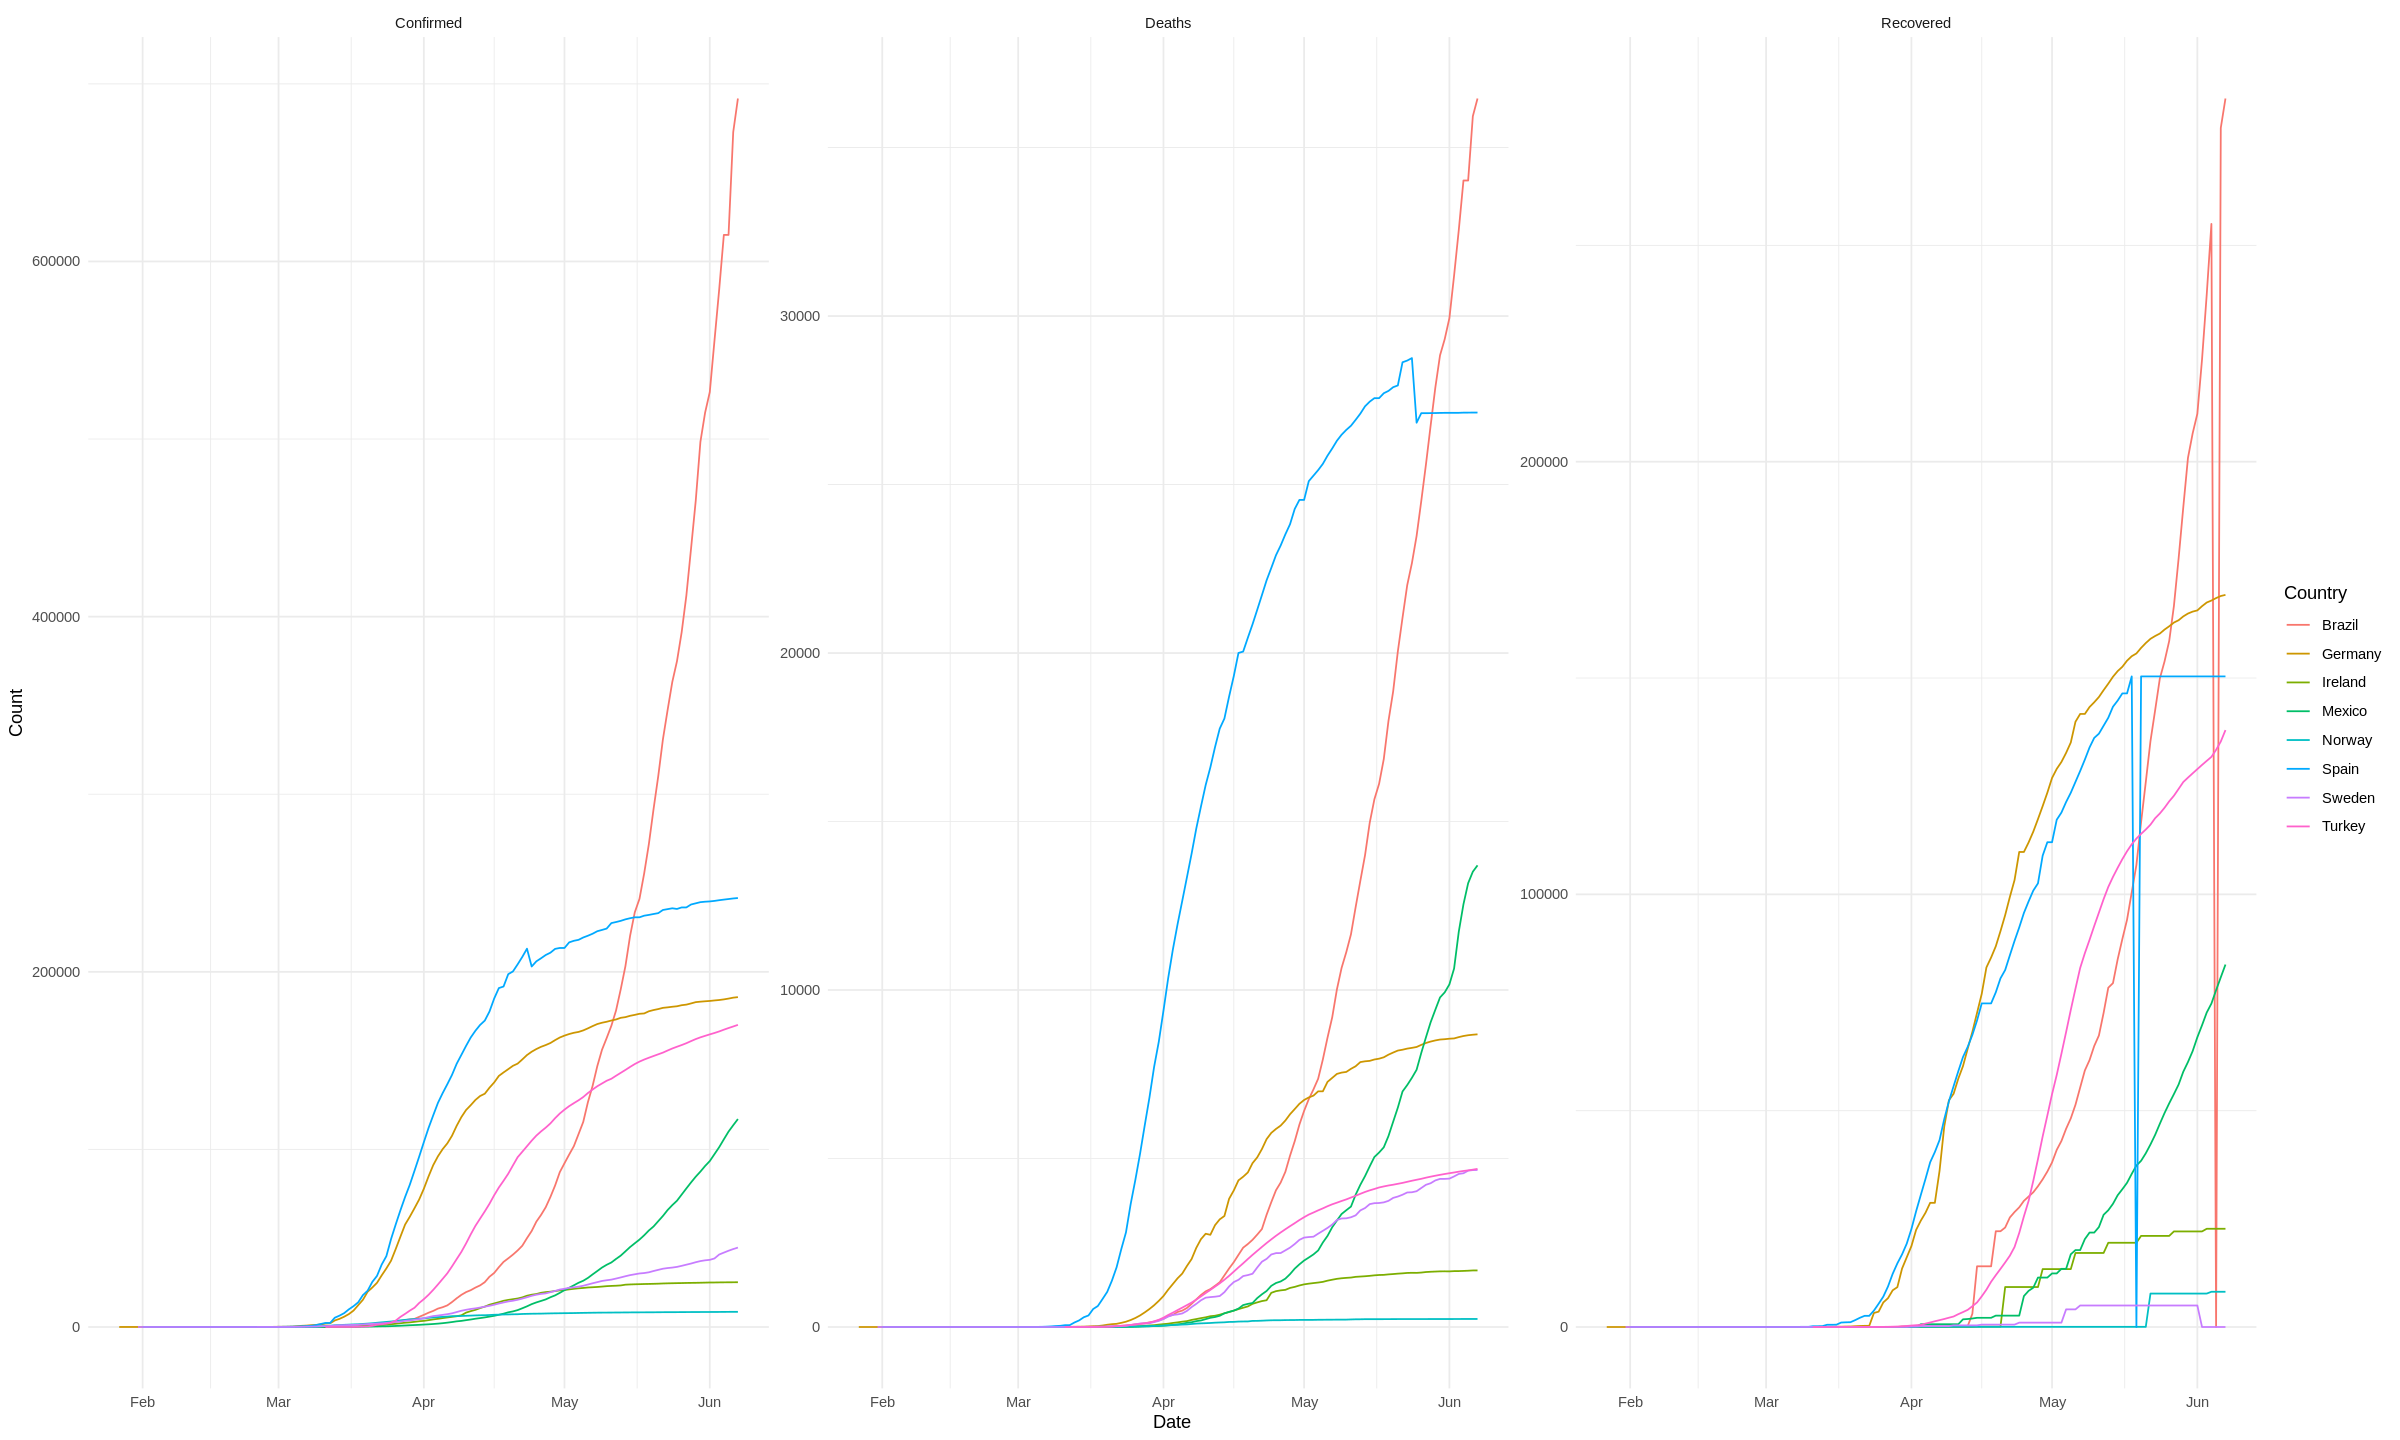

In [0]:
options(repr.plot.width=20, repr.plot.height=12)

covid_long %>%
#filter(type == "Deaths") %>%
ggplot(aes(x=Date, y=Count)) +
geom_line(aes(group= Country, color= Country)) +
facet_wrap(~type, scales="free")+
theme_minimal()+
scale_x_date(date_labels = "%b")
  

Inspecting the resulting data-set you will find that some countries report cases on a country level while others report them on a province or even city level. Your next task is to aggregate the data on a country level. Subsequently, you should create a faceted plot showing the confirmed cases, as well as the number of deaths and the recovered patients.

Hint 1: You will have to reshape your data to a long format.<br>
Hint 2: You can try to recreate the following plot.

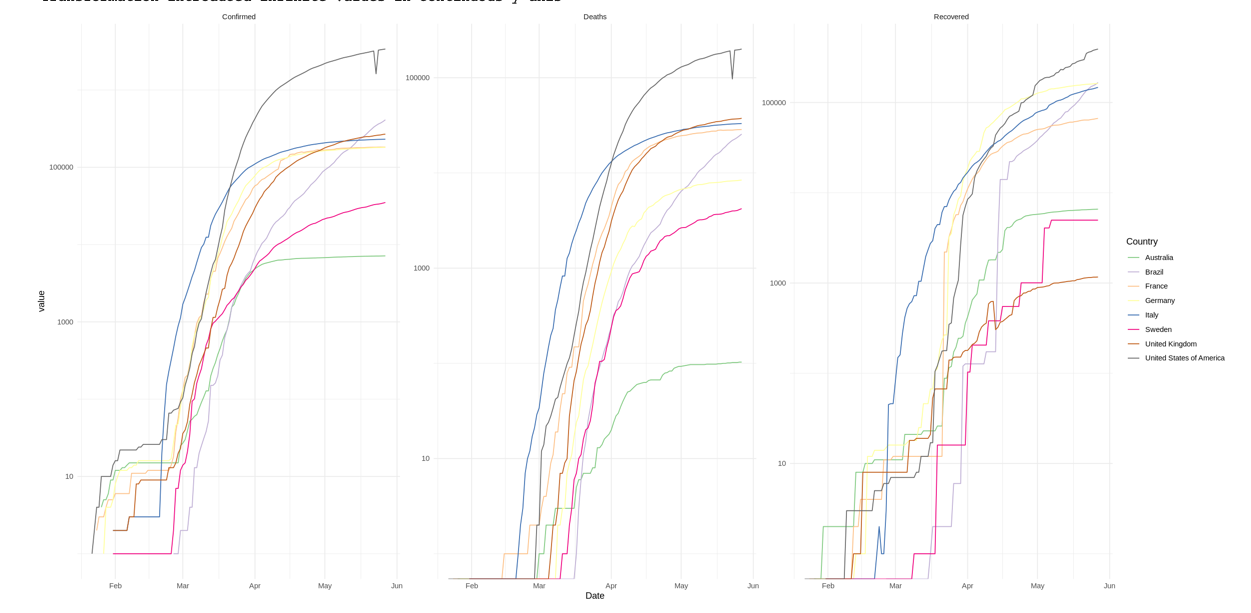

## Task 2
**Formula One Racing**

The Ergast Developer API provides data for the Formula One from the beginning of the world championships in 1950. You can find a detailed documentation of the API and its endpoints [here](http://ergast.com/mrd/).

Your first task is to familiarize yourself with the API by requesting a dataframe of all drivers. How many drivers have participated in the Formula One over the years?

Hint 1: You can add the query parameter ```.json``` to your request to modify the response format.<br>
Hint 2: You can add the query parameter ```?limit=1000``` to request longer lists.

In [2]:
url = "http://ergast.com/api/f1/drivers.json?limit=1000"
f1_data = fromJSON(url) 
f1_data$MRData$DriverTable$Drivers %>%
distinct(driverId)

driverId
<chr>
abate
abecassis
acheson
adams
ader
adolff
agabashian
ahrens
albers


Plot the number of drivers from the countries in the list ```nationalities``` as a bar chart.

In [3]:
f1_data$MRData$DriverTable$Drivers %>%
as.data.frame -> f1_df
f1_df %>% head()


,driverId,url,givenName,familyName,dateOfBirth,nationality,code,permanentNumber
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,abate,http://en.wikipedia.org/wiki/Carlo_Mario_Abate,Carlo,Abate,1932-07-10,Italian,NA,NA
2,abecassis,http://en.wikipedia.org/wiki/George_Abecassis,George,Abecassis,1913-03-21,British,NA,NA
3,acheson,http://en.wikipedia.org/wiki/Kenny_Acheson,Kenny,Acheson,1957-11-27,British,NA,NA
4,adams,http://en.wikipedia.org/wiki/Philippe_Adams,Philippe,Adams,1969-11-19,Belgian,NA,NA
5,ader,http://en.wikipedia.org/wiki/Walt_Ader,Walt,Ader,1913-12-15,American,NA,NA
6,adolff,http://en.wikipedia.org/wiki/Kurt_Adolff,Kurt,Adolff,1921-11-05,German,NA,NA


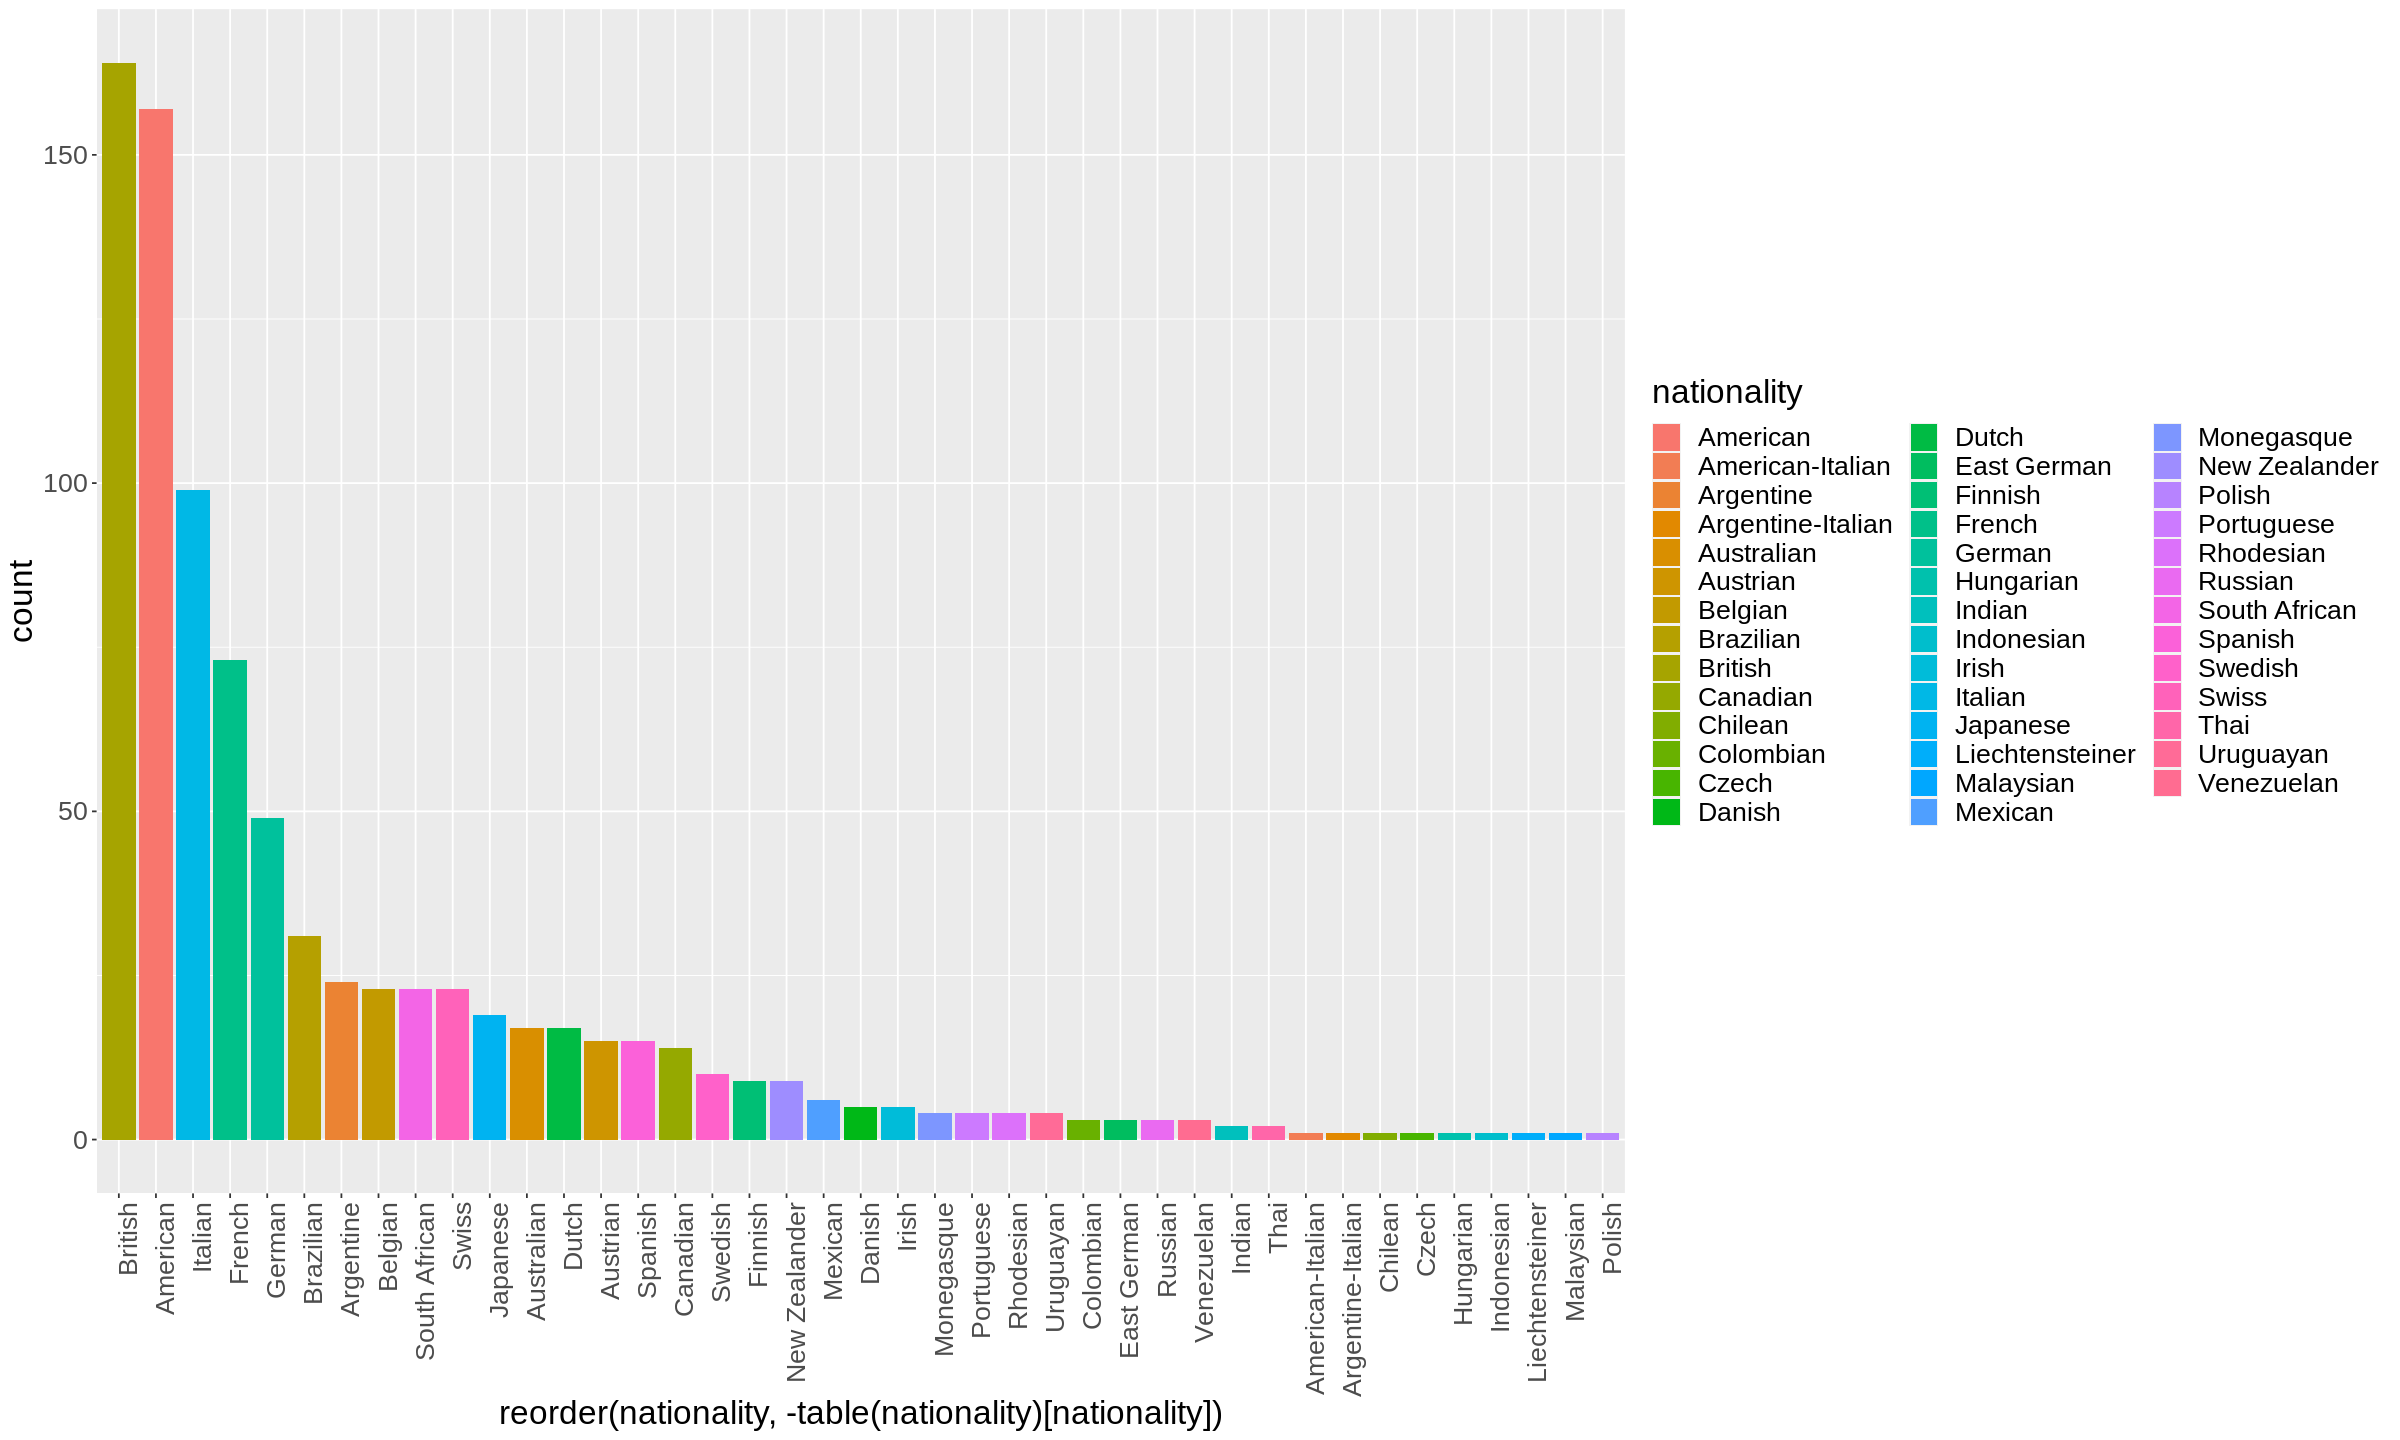

In [75]:
options(repr.plot.width=20, repr.plot.height=12)
f1_df %>%

ggplot(aes(x=reorder (nationality, -table(nationality)[nationality]))) +
geom_bar(aes(fill = nationality)) +
theme(axis.text.x = element_text(angle = 90, hjust = 1),
text = element_text(size=20))



* not sure if its better without the fill option

In order to perform more complex analysis we need additional API requests. However, these requests sometimes lead to complex responses (depending on the API) that are not easy to handle. Fortunately, R has a big community that often provides wrappers for many APIs in the form of libraries. For the following analysis you can either try to figure out your own requests or use the library ```formula1data```. You can use the following code to install it:

In [41]:
devtools::install_github('thomasp85/gganimate')
library(gganimate)

ggplot2   (3.3.0 -> 3.3.1) [CRAN]
rprojroot (1.2   -> 1.3-2) [CRAN]
processx  (3.4.1 -> 3.4.2) [CRAN]
farver    (2.0.1 -> 2.0.3) [CRAN]


Installing 4 packages: ggplot2, rprojroot, processx, farver

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpoqJQud/remotes7a7825f16c/thomasp85-gganimate-7fb8261/DESCRIPTION’
─  preparing ‘gganimate’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘gganimate_1.0.5.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session



In [4]:
install.packages("devtools")
library(devtools)
install_github("arkraieski/formula1data")
library(formula1data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis




lubridate (1.7.8 -> 1.7.9) [CRAN]
dplyr     (0.8.5 -> 1.0.0) [CRAN]
vctrs     (0.3.0 -> 0.3.1) [CRAN]
curl      (4.2   -> 4.3  ) [CRAN]


Installing 4 packages: lubridate, dplyr, vctrs, curl

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpoqJQud/remotes7a7bf9d486/arkraieski-formula1data-8175bb6/DESCRIPTION’
─  preparing ‘formula1data’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘formula1data_0.1.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Your next task is to visualize the standings during the season 2018. To this end you have to download the standings after each race in the year 2018. 

Hint 1: There have been 21 races in the year 2018<br>
Hint 2: You can use map to apply the download function for each race<br>
Hint 3: You can use a download function similar to ```resultGetter = function(x){getF1StandingsAfterRace(2018, x)}```

In [0]:
x = 1:21
resultGetter = function(x) {getF1StandingsAfterRace(2018, x, type="driver")
  
}


In [6]:
map_df(x, resultGetter) -> f1_mapped
f1_mapped

position,points,wins,driverId
<int>,<int>,<int>,<chr>
1,25,1,vettel
2,18,0,hamilton
3,15,0,raikkonen
4,12,0,ricciardo
5,10,0,alonso
6,8,0,max_verstappen
7,6,0,hulkenberg
8,4,0,bottas
9,2,0,vandoorne


In [0]:
names(counter_df)[names(counter_df) == '.'] <- 'races'


* very dumb hardcoded solution for racenumber incoming

In [0]:
counter <- c("1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1", "2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2", "3", "3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3", "4", "4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4", "5", "5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","6","6","6","6","6","6","6","6","6","6","6","6","6","6","6","6","6","6","6","6",
"7","7","7","7","7","7","7","7","7","7","7","7","7","7","7","7","7","7","7","7","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","9","9","9","9","9","9","9","9","9","9","9","9","9","9","9","9","9","9","9","9","10","10","10","10","10","10","10","10","10","10","10","10","10","10","10","10","10","10","10","10", "11","11","11","11","11","11","11","11","11","11","11","11","11","11","11","11","11","11","11","11","12","12","12","12","12","12","12","12","12","12","12","12","12","12","12","12","12","12","12","12",
"13","13","13","13","13","13","13","13","13","13","13","13","13","13","13","13","13","13","13","13", "14","14","14","14","14","14","14","14","14","14","14","14","14","14","14","14","14","14","14","14","15","15","15","15","15","15","15","15","15","15","15","15","15","15","15","15","15","15","15","15","16","16","16","16","16","16","16","16","16","16","16","16","16","16","16","16","16","16","16","16","17","17","17","17","17","17","17","17","17","17","17","17","17","17","17","17","17","17","17","17","18","18","18","18","18","18","18","18","18","18","18","18","18","18","18","18","18","18","18","18","19","19","19","19","19","19","19","19","19","19","19","19","19","19","19","19","19","19","19","19",
"20","20","20","20","20","20","20","20","20","20","20","20","20","20","20","20","20","20","20","20", "21","21","21","21","21","21","21","21","21","21","21","21","21","21","21","21","21","21","21","21")
counter %>%
as.data.frame -> counter_df
counter_df

In [11]:
f1_mapped %>%
left_join(f1_df, by="driverId") -> f1_joined 
f1_joined %>%
select("position", "points", "wins", "driverId", "givenName", "familyName") -> f1_selected
f1_selected

position,points,wins,driverId,givenName,familyName
<int>,<int>,<int>,<chr>,<chr>,<chr>
1,25,1,vettel,Sebastian,Vettel
2,18,0,hamilton,Lewis,Hamilton
3,15,0,raikkonen,Kimi,Räikkönen
4,12,0,ricciardo,Daniel,Ricciardo
5,10,0,alonso,Fernando,Alonso
6,8,0,max_verstappen,Max,Verstappen
7,6,0,hulkenberg,Nico,Hülkenberg
8,4,0,bottas,Valtteri,Bottas
9,2,0,vandoorne,Stoffel,Vandoorne


In [12]:
f1_selected %>%
cbind(counter_df) -> f1_final
f1_final

position,points,wins,driverId,givenName,familyName,races
<int>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
1,25,1,vettel,Sebastian,Vettel,1
2,18,0,hamilton,Lewis,Hamilton,1
3,15,0,raikkonen,Kimi,Räikkönen,1
4,12,0,ricciardo,Daniel,Ricciardo,1
5,10,0,alonso,Fernando,Alonso,1
6,8,0,max_verstappen,Max,Verstappen,1
7,6,0,hulkenberg,Nico,Hülkenberg,1
8,4,0,bottas,Valtteri,Bottas,1
9,2,0,vandoorne,Stoffel,Vandoorne,1


In [31]:
f1_final %>%
unite("name", c(givenName, familyName), sep= " ", remove = TRUE) -> f1_plot
f1_plot %>% 

head()

,position,points,wins,driverId,name,races
,<int>,<int>,<int>,<chr>,<chr>,<fct>
1,1,25,1,vettel,Sebastian Vettel,1
2,2,18,0,hamilton,Lewis Hamilton,1
3,3,15,0,raikkonen,Kimi Räikkönen,1
4,4,12,0,ricciardo,Daniel Ricciardo,1
5,5,10,0,alonso,Fernando Alonso,1
6,6,8,0,max_verstappen,Max Verstappen,1


In [36]:
#f1_plot %>%
#as.numeric("races") 
f1_plot$races <- as.numeric(as.character(f1_plot$races))
f1_plot %>%
head()

,position,points,wins,driverId,name,races
,<int>,<int>,<int>,<chr>,<chr>,<dbl>
1,1,25,1,vettel,Sebastian Vettel,1
2,2,18,0,hamilton,Lewis Hamilton,1
3,3,15,0,raikkonen,Kimi Räikkönen,1
4,4,12,0,ricciardo,Daniel Ricciardo,1
5,5,10,0,alonso,Fernando Alonso,1
6,6,8,0,max_verstappen,Max Verstappen,1


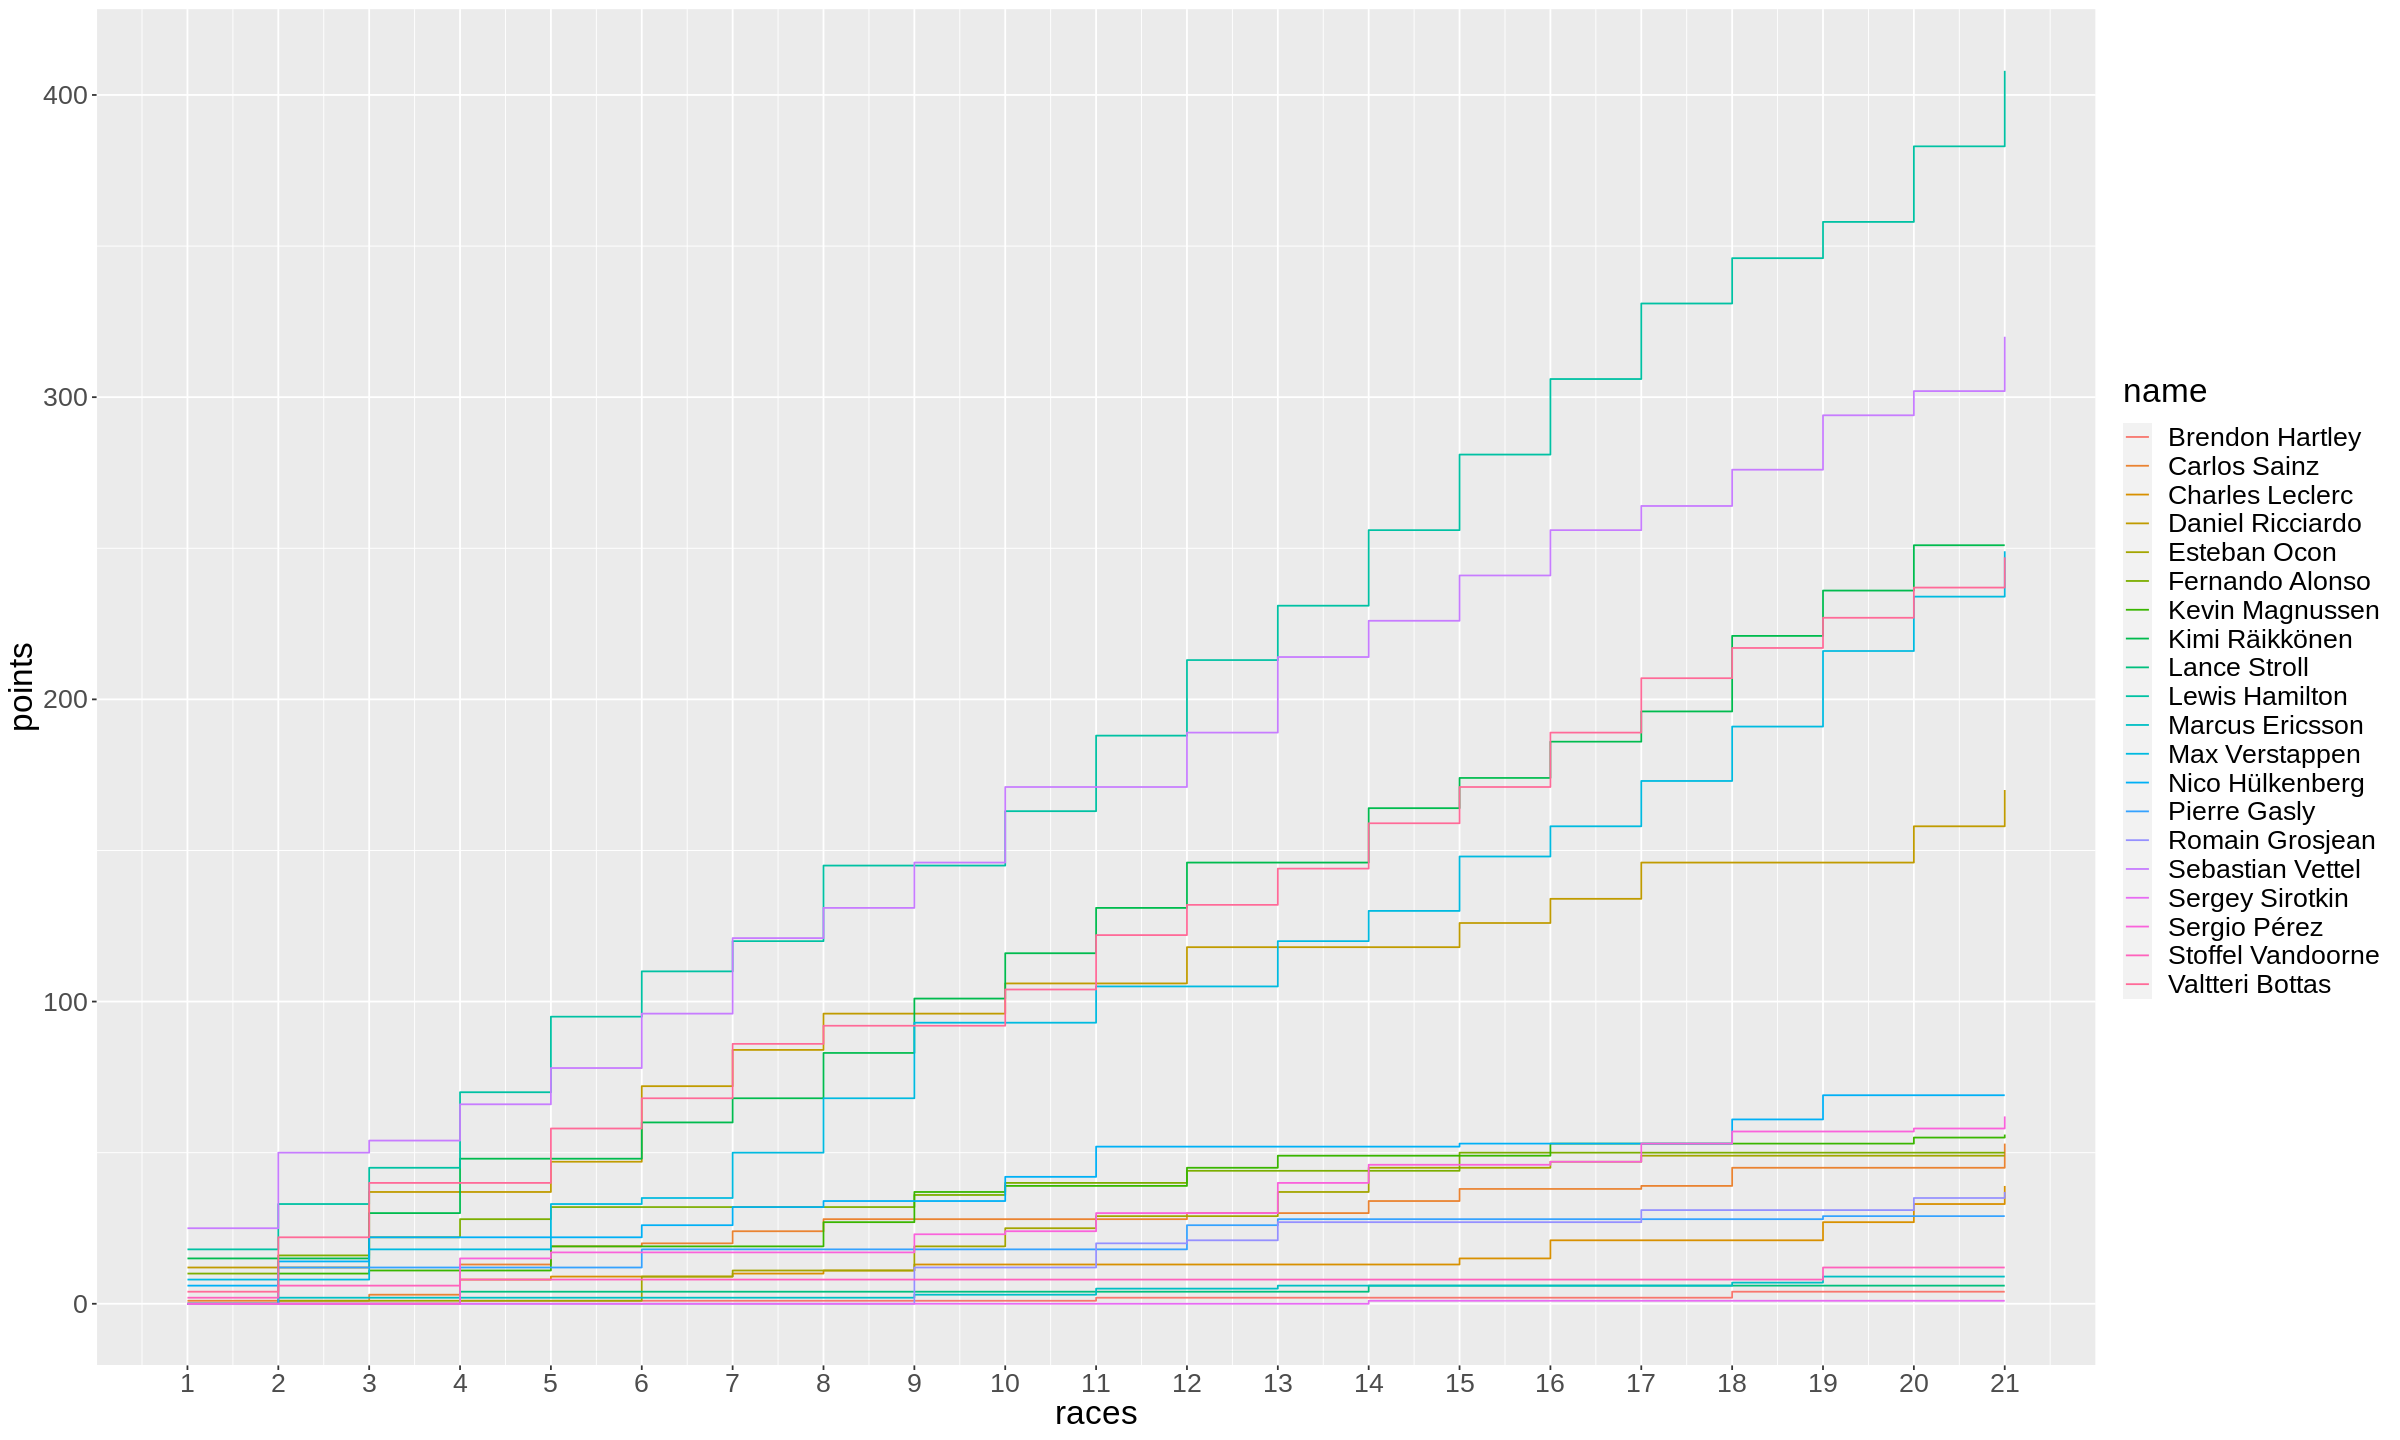

In [78]:

options(repr.plot.width=20, repr.plot.height=12)

f1_plot %>%
arrange(races) %>%
ggplot(aes(x= races, y=points)) + 
geom_step(aes(group=name, color = name))+
theme(text = element_text(size=20))+
scale_x_continuous(breaks= c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21))


* Dont know how to display the nice incremental change (Stufen-Look)

* unfortunately the animation does not seem to work in this environment. Could not find out why

In [45]:
f1_plot %>%
arrange(races) %>%
ggplot(aes(x= races, y=points)) + 
geom_line(aes(group=name, color = name)) + 
transition_reveal(races)

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called ‘plotly’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_plotly1.ggplot(

  [1] "./gganim_plot0001.png" "./gganim_plot0002.png" "./gganim_plot0003.png"
  [4] "./gganim_plot0004.png" "./gganim_plot0005.png" "./gganim_plot0006.png"
  [7] "./gganim_plot0007.png" "./gganim_plot0008.png" "./gganim_plot0009.png"
 [10] "./gganim_plot0010.png" "./gganim_plot0011.png" "./gganim_plot0012.png"
 [13] "./gganim_plot0013.png" "./gganim_plot0014.png" "./gganim_plot0015.png"
 [16] "./gganim_plot0016.png" "./gganim_plot0017.png" "./gganim_plot0018.png"
 [19] "./gganim_plot0019.png" "./gganim_plot0020.png" "./gganim_plot0021.png"
 [22] "./gganim_plot0022.png" "./gganim_plot0023.png" "./gganim_plot0024.png"
 [25] "./gganim_plot0025.png" "./gganim_plot0026.png" "./gganim_plot0027.png"
 [28] "./gganim_plot0028.png" "./gganim_plot0029.png" "./gganim_plot0030.png"
 [31] "./gganim_plot0031.png" "./gganim_plot0032.png" "./gganim_plot0033.png"
 [34] "./gganim_plot0034.png" "./gganim_plot0035.png" "./gganim_plot0036.png"
 [37] "./gganim_plot0037.png" "./gganim_plot0038.png" "./gganim_

Use the resulting dataframe to plot the development of the standings during the season. 

Hint 1: You will have to join the race data and the driver data from the previous part of the task.<br>
Hint 2: You can try to recreate the following plot. However, we are happy if you have different ideas.

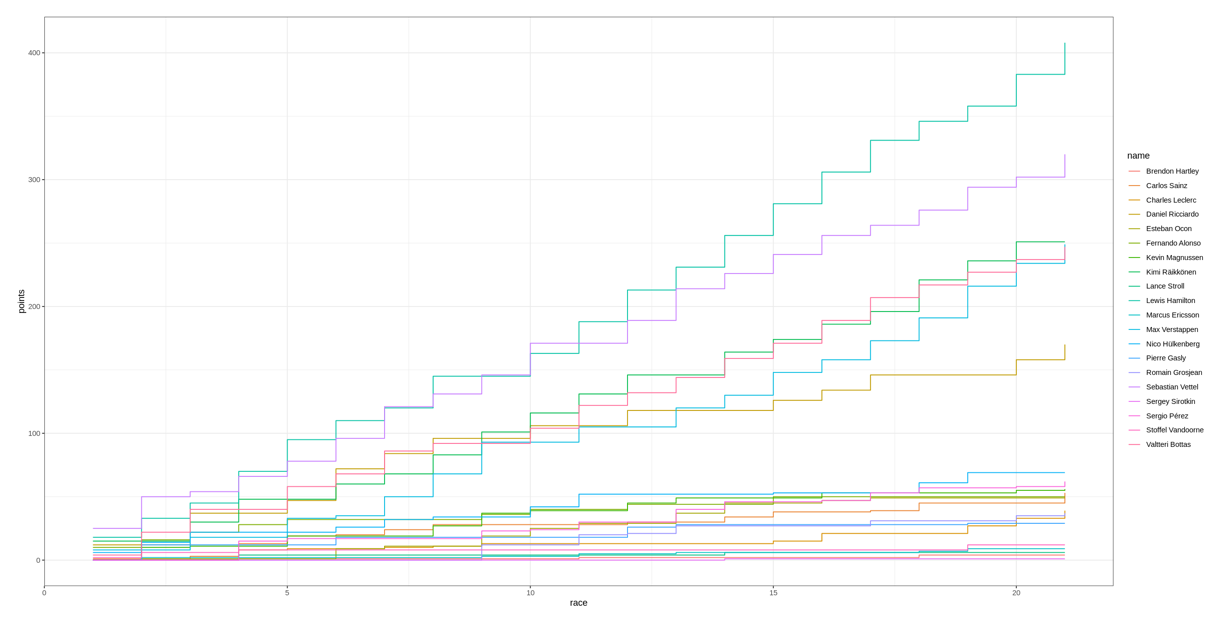

For the final analysis you should request the final standings for all Formular One seasons since 1950. Subsequently, you should identify all drivers that won at least 3 championships and visualize them using a column plot.  

Hint 1: You can try to recreate the following plot. However, we are happy if you have different ideas.<br>
Hint 2: You can use map to apply the download function for each season

In [0]:
x = 1950:2019
finalstanding = function(x) {getFinalF1Standings(x, type="driver")
  
}

In [0]:
getFinalF1Standings(1950, type= "driver")

In [54]:
map_df(x, finalstanding) -> champ_mapped
champ_mapped

position,points,wins,driverId
<int>,<int>,<int>,<chr>
1,30,3,farina
2,27,3,fangio
3,24,0,fagioli
4,13,0,rosier
5,11,0,ascari
6,9,1,parsons
7,6,0,holland
8,5,0,bira
9,4,0,whitehead


In [57]:
champ_mapped %>%
filter(position == "1") %>%
left_join(f1_df, by="driverId") -> champ_joined
champ_joined %>%
select("position", "points", "wins", "driverId", "givenName", "familyName") -> champ_sel
champ_sel %>%
head()

,position,points,wins,driverId,givenName,familyName
,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,1,30,3,farina,Nino,Farina
2,1,31,3,fangio,Juan,Fangio
3,1,36,6,ascari,Alberto,Ascari
4,1,34,5,ascari,Alberto,Ascari
5,1,42,6,fangio,Juan,Fangio
6,1,40,4,fangio,Juan,Fangio


In [58]:
champ_sel %>%
unite("name", c(givenName, familyName), sep= " ", remove = TRUE) -> champ_name
champ_name %>% 
head()

,position,points,wins,driverId,name
,<int>,<int>,<int>,<chr>,<chr>
1,1,30,3,farina,Nino Farina
2,1,31,3,fangio,Juan Fangio
3,1,36,6,ascari,Alberto Ascari
4,1,34,5,ascari,Alberto Ascari
5,1,42,6,fangio,Juan Fangio
6,1,40,4,fangio,Juan Fangio


In [60]:
champ_name %>%
group_by(driverId) %>%
filter(n()>2) -> champ_filtered
champ_filtered %>%
arrange(driverId)

position,points,wins,driverId,name
<int>,<int>,<int>,<chr>,<chr>
1,31,3,fangio,Juan Fangio
1,42,6,fangio,Juan Fangio
1,40,4,fangio,Juan Fangio
1,30,3,fangio,Juan Fangio
1,40,4,fangio,Juan Fangio
1,98,5,hamilton,Lewis Hamilton
1,384,11,hamilton,Lewis Hamilton
1,381,10,hamilton,Lewis Hamilton
1,363,9,hamilton,Lewis Hamilton


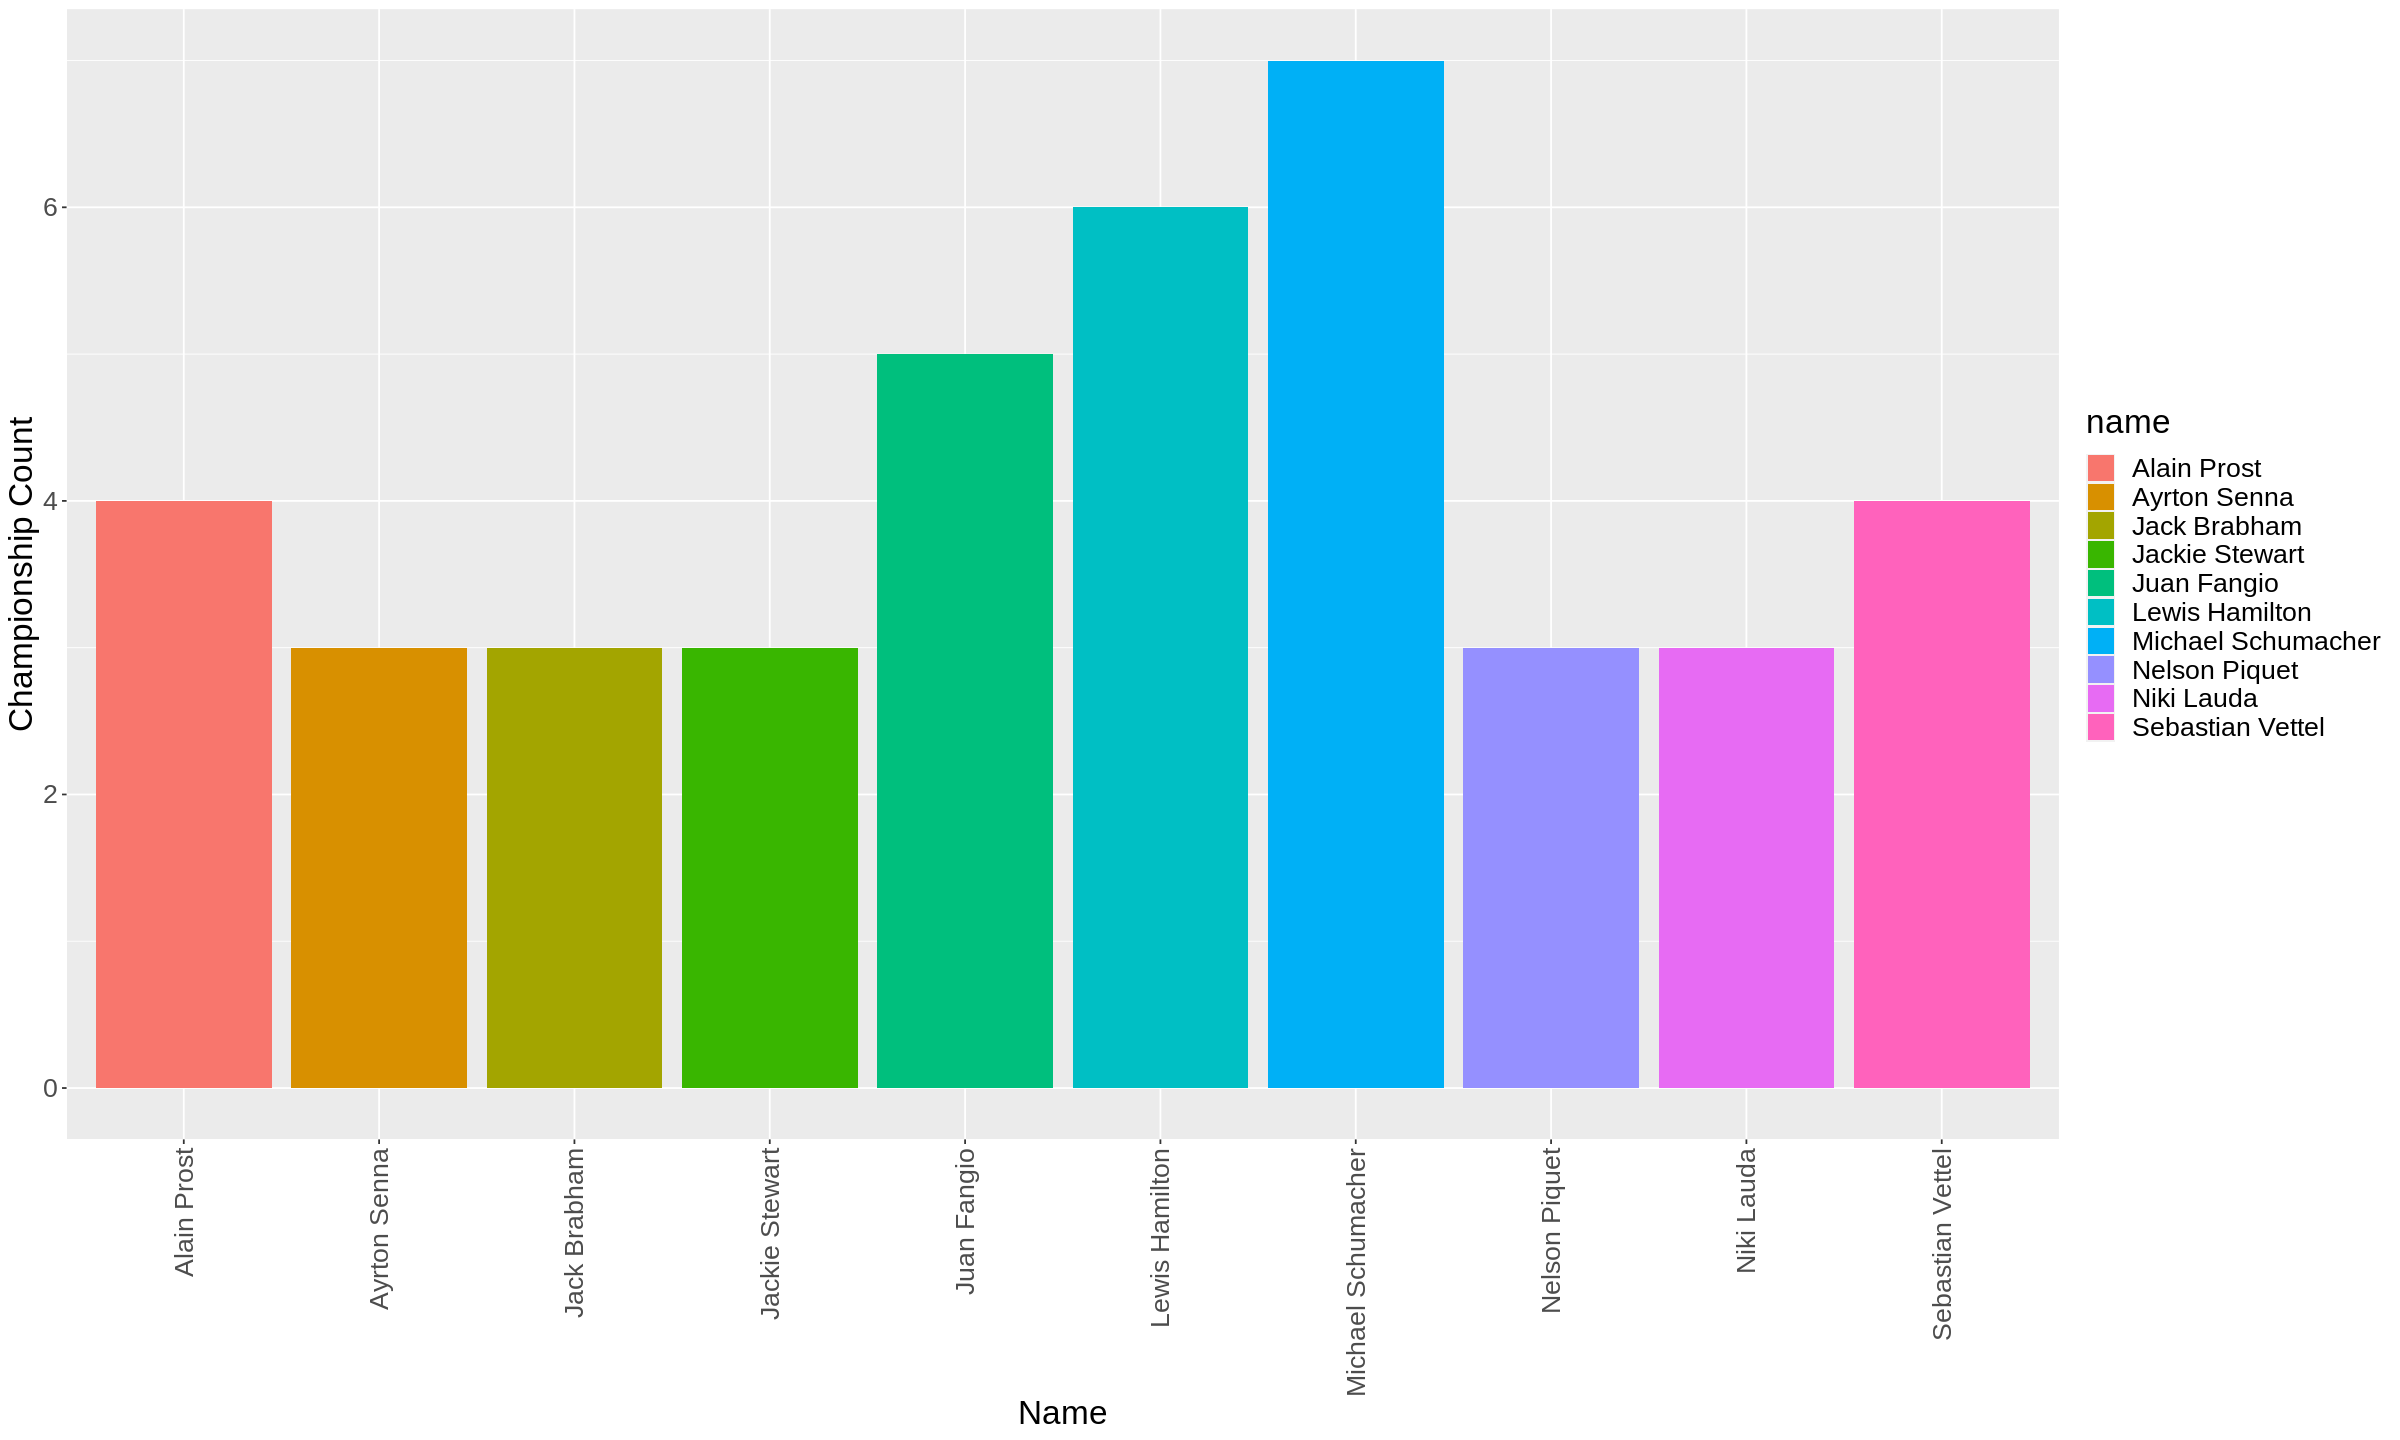

In [73]:
options(repr.plot.width=20, repr.plot.height=12)

champ_filtered %>%
ggplot(aes(x= name, fill = name))+
geom_bar()+
labs(y= "Championship Count") +
labs(x= "Name") +
theme(text = element_text(size=20),
axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))



![image.png](attachment:image.png)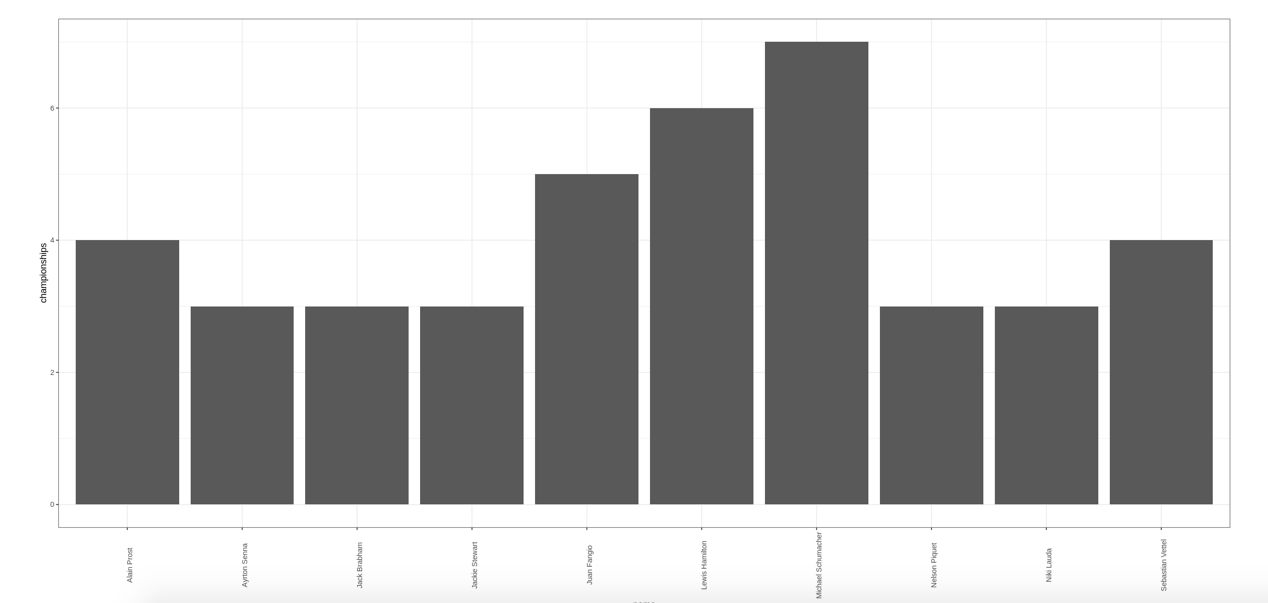

In [0]:
# Insert your code here

## Task 3
**Buying a new car**

You are planning to buy a new (used) car and this time want to do it in a data science fashion. Pick a vehicle of your choice (you should not opt for a too obscure make to find sufficient data), go to a used car website of your choice (e.g., autoscout24) and retrieve at least 1,000 vehicles offers. To minimize the number of calls to the website you should avoid scraping from the individual offer site but rather extract as much information as possible from the overview site. 

Hint 1: You may not have to extract the navigation links but can simply increment the page counter of the results url

In [0]:
# Insert your code here

Having scraped the data you will probably find that many columns are not well formated for further analysis (e.g., the price can contain € or \$ signs, , the milage km or miles and so on.  
Use regular expressions and the ```stringr``` package to clear the strings. 

Hint: You can use the [stringr cheatsheet](https://github.com/rstudio/cheatsheets/blob/master/strings.pdf) to look for available regular expressions.

In [0]:
# Insert your code here

Finally, you should create at least two visualizations. Descripe and explain the plots to get a deeper understanding of the market.

In [0]:
# Insert your code here